In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from factorio.recipe_functions import *
from factorio.types.crafting_environment import CraftingEnvironment

In [15]:
crafting_environment = CraftingEnvironment(['electronic-circuit', 'copper-plate', 'iron-plate'])

In [16]:
recipe_tree = get_crafting_tree(Material('assembling-machine-1', 1), crafting_environment)
list(recipe_tree.iterate_all_steps())

[Materials assembling-machine-1: 1
 	Materials electronic-circuit: 3
 	Materials iron-gear-wheel: 5
 		Materials iron-plate: 10
 	Materials iron-plate: 9,
 Materials electronic-circuit: 3,
 Materials iron-gear-wheel: 5
 	Materials iron-plate: 10,
 Materials iron-plate: 10,
 Materials iron-plate: 9]

In [17]:
materials = get_basic_materials(Material('logistic-robot', 1), crafting_environment)
materials

Materials copper-plate: 6; electronic-circuit: 9; coal: 2; petroleum-gas: 130; iron-plate: 17; water: 190; heavy-oil: 20

In [18]:
get_basic_materials('electronic-circuit', crafting_environment)

Materials electronic-circuit: 1

In [19]:
graph = get_crafting_tree(Material('assembling-machine-1', 1), crafting_environment)
graph

Materials assembling-machine-1: 1
	Materials electronic-circuit: 3
	Materials iron-gear-wheel: 5
		Materials iron-plate: 10
	Materials iron-plate: 9

In [20]:
get_basic_materials(Material('assembling-machine-1', 10), crafting_environment)

Materials electronic-circuit: 30; iron-plate: 190

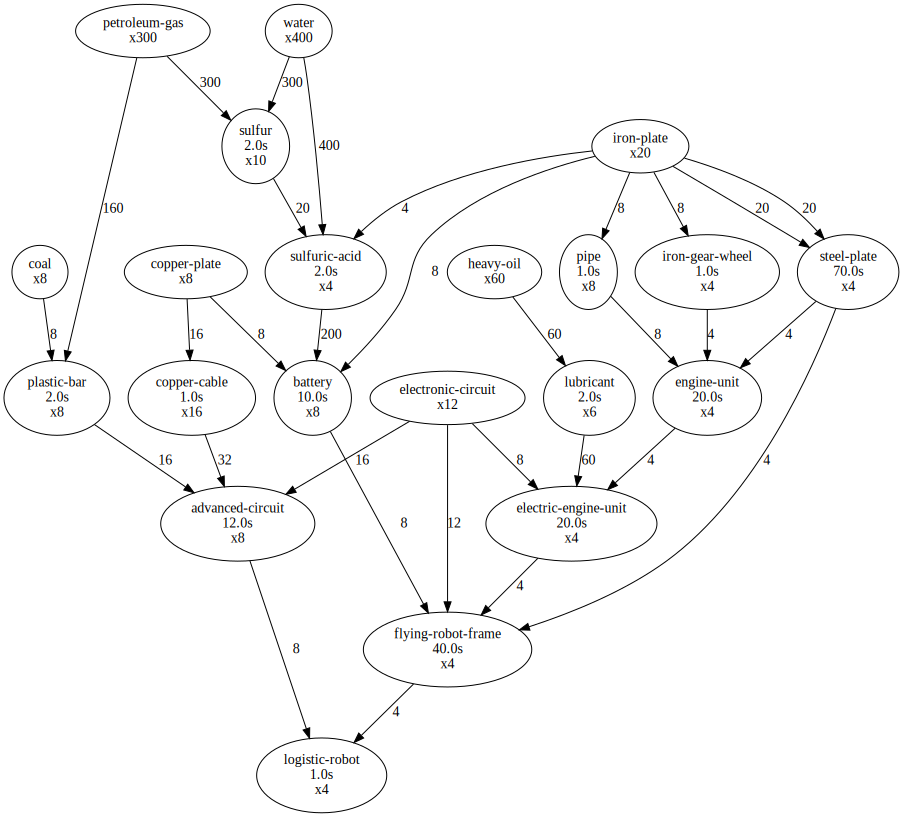

In [23]:
# print(get_basic_materials(Material('logistic-robot', 1), crafting_environment))
graph = build_recipe_graph(Material('logistic-robot', 4), crafting_environment)
graph

In [12]:
recipes_info['logistic-robot'].get_required_materials()

Materials advanced-circuit: 2; flying-robot-frame: 1

In [10]:
get_basic_materials(Material('electronic-circuit', 90))

Materials copper-ore: 135; iron-ore: 90

In [14]:
from factorio.types.transport_belt import transport_belt_2
get_basic_materials(transport_belt_2 * 10, crafting_environment)

[autoreload of factorio.types.material failed: Traceback (most recent call last):
  File "C:\Users\anton\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\anton\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\anton\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\anton\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "C:\Users\anton\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "<string>", line 4, in __setattr__
dataclasses.FrozenInstanceError: cannot assign to field '__class__'
]
[aut

ValueError: invalid key type

In [12]:
build_recipe_graph(transport.transport_belt_1 * 10, crafting_environment)

NameError: name 'transport' is not defined